In [ ]:
!pip install easyocr

In [ ]:
!pip install opencv-python

In [ ]:
!pip install gradio

In [ ]:
!pip install git+https://github.com/JaidedAI/EasyOCR.git

In [1]:
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
import easyocr
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import gradio as gr

In [4]:
image = "C:/Users/User/Desktop/Untitled Folder/receipt1_1.jpg"

In [5]:
def read_easyocr(image):
    reader = easyocr.Reader(['ko','en'])
    results = reader.readtext(image)
    return results

In [6]:
def read_pytesseract(image):
    results = pytesseract.image_to_string(image, lang='kor+eng')
    return results

In [7]:
# 필터 적용해주기
def sepia(input_img):
    sepia_filter = np.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])
    sepia_img = input_img.dot(sepia_filter.T)
    sepia_img /= sepia_img.max()
    return sepia_img

In [8]:
path = "C:/Users/User/Desktop/Untitled Folder/receipt1_1.jpg"

In [9]:
os.path.isfile(path)

True

In [10]:
from PIL import Image

In [11]:
%matplotlib notebook

In [15]:
from PIL import Image, ExifTags

<IPython.core.display.Javascript object>


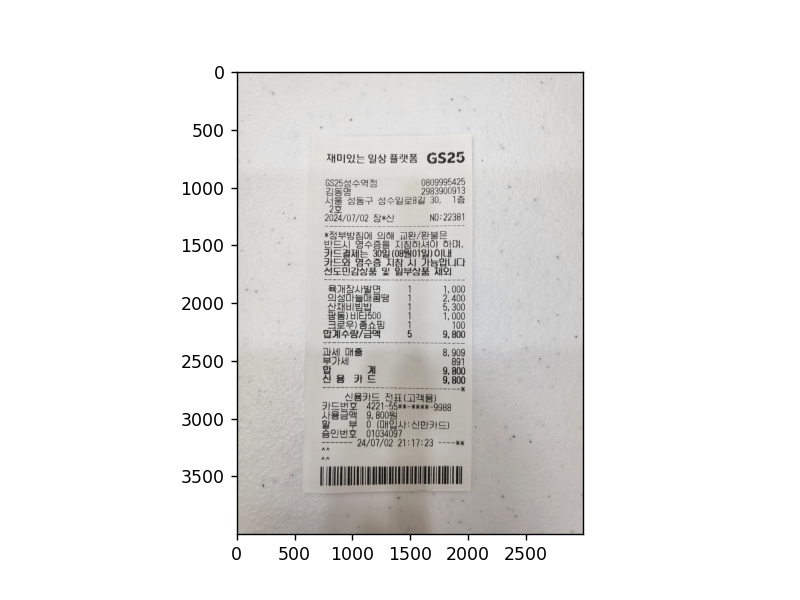

In [16]:
# Pillow를 사용하여 이미지 로드 및 방향 수정
pil_image = Image.open(path)

# EXIF 데이터를 사용하여 이미지 방향 수정
try:
    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    exif = pil_image._getexif()
    if exif is not None:
        orientation = exif[orientation]
        if orientation == 3:
            pil_image = pil_image.rotate(180, expand=True)
        elif orientation == 6:
            pil_image = pil_image.rotate(270, expand=True)
        elif orientation == 8:
            pil_image = pil_image.rotate(90, expand=True)
except (AttributeError, KeyError, IndexError):
    # EXIF 데이터가 없거나 처리 중 오류가 발생한 경우는 그대로 진행
    pass

pil_image = pil_image.convert('RGB')  # RGB로 변환
image = np.array(pil_image)  # 이미지를 numpy 배열로 변환

# 마우스 클릭 이벤트 처리 함수
def onclick(event):
    x, y = event.xdata, event.ydata
    print(f"x: {int(x)}, y: {int(y)}")

# 이미지 표시
fig, ax = plt.subplots()
ax.imshow(image)

# 클릭 이벤트 연결
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

(4000, 3000, 3)


<IPython.core.display.Javascript object>


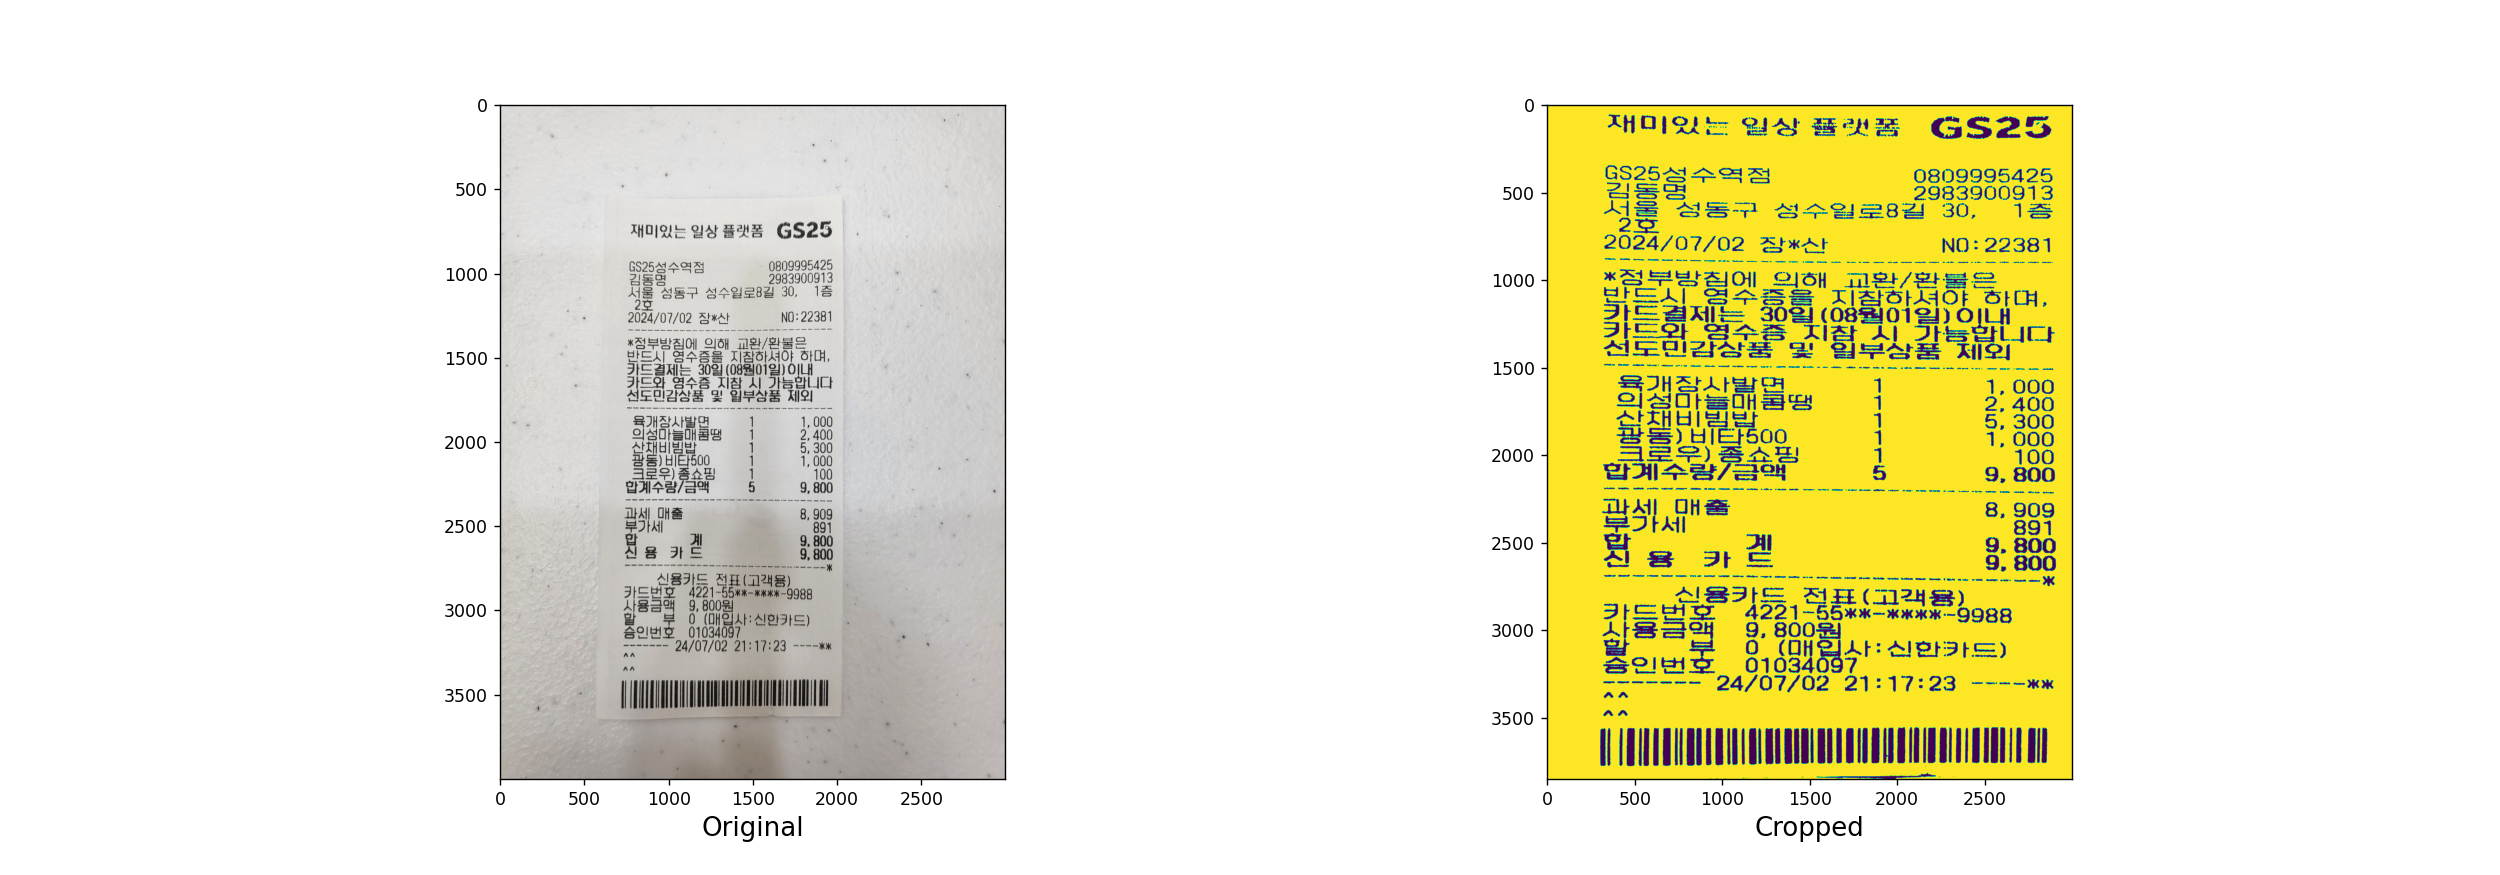

In [17]:
# Image Load (BGR)
image = cv2.imread(path)  # image size (9248, 6936, 3)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

plt.figure(figsize = [20, 7])
plt.subplot(1,2,1)
plt.imshow(image)
plt.xlabel("Original", fontsize = 15)

x1, y1 = 618, 558
x2, y2 = 2025, 525
x3, y3 = 574, 3642
x4, y4 = 2014, 3642

(4000, 3000, 3)


<IPython.core.display.Javascript object>


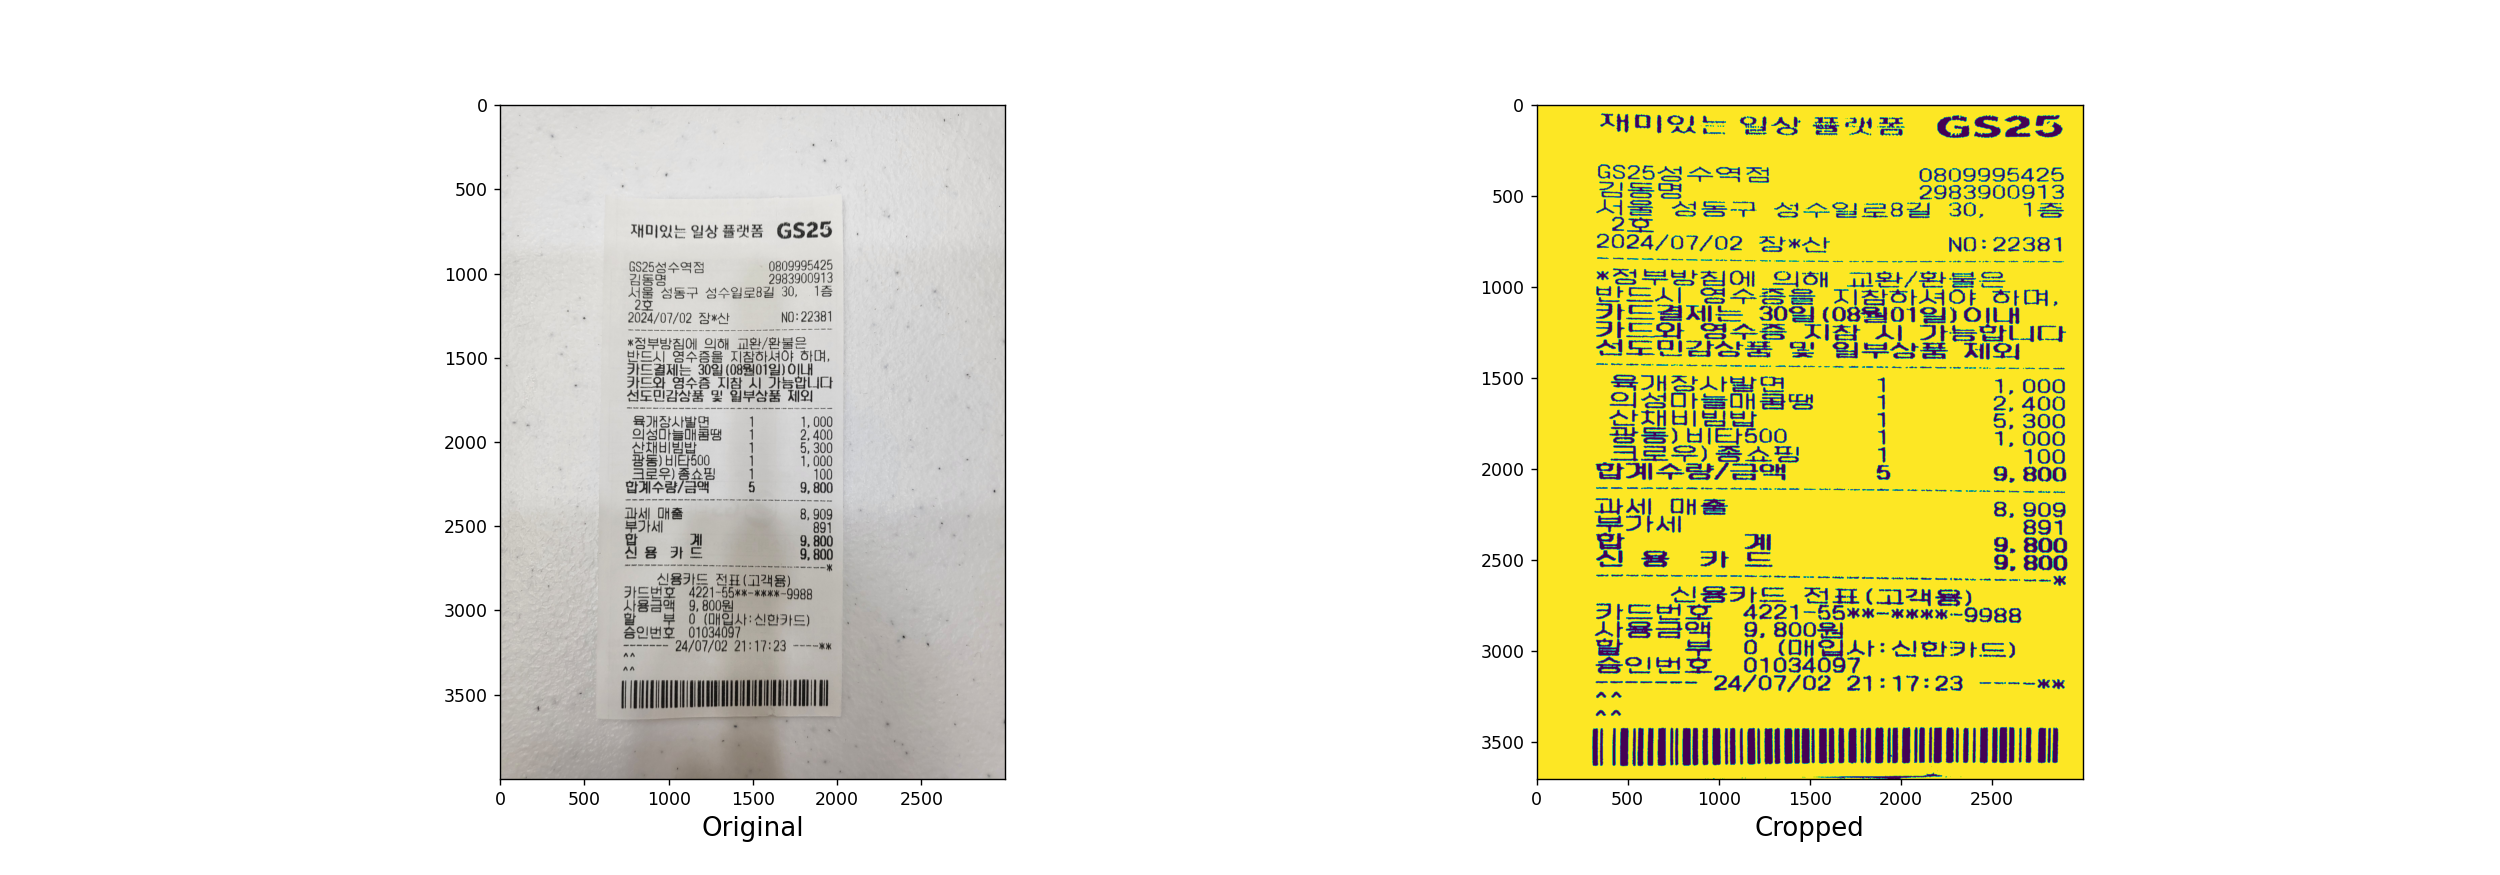

(3700, 3000)
uint8
ROI (x, y, w, h) :  (0, 150, 3000, 3850)


In [19]:
# Image Load (BGR)
image = cv2.imread(path)  # image size (9248, 6936, 3)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

plt.figure(figsize = [20, 7])
plt.subplot(1,2,1)
plt.imshow(image)
plt.xlabel("Original", fontsize = 15)

x1, y1 = 618, 558
x2, y2 = 2025, 525
x3, y3 = 574, 3642
x4, y4 = 2014, 3642

# 원래 이미지에서 차지하는 부분 좌표
src_points = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])

# 결과 이미지에서 원래 이미지 크기 그대로 자르기 위한 좌표
dst_points = np.float32([[0, 0], [3000, 0], [0, 3850], [3000, 3850]])

# 변환 매트릭스
M = cv2.getPerspectiveTransform(src_points, dst_points)

# 이미지 변환
transformed_image = cv2.warpPerspective(image, M, (3000, 3850))

getROI = (0, 150, 3000, 3850) # (x, y, w, h)

# 자르기
cropped_image = transformed_image[getROI[1]:getROI[1]+getROI[3], getROI[0]:getROI[0]+getROI[2]]


# 세피아 필터 적용해서 결과 확인해보기
img = sepia(cropped_image)
# 이미지 정규화
img = cv2.normalize(cropped_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img = img.astype('uint8')

# 이미지 shape 수정
img = np.squeeze(img)

# 필터
# 이미지 이진화
# 미디안 블러를 적용하여 이미지 노이즈 제거
blurred = cv2.medianBlur(cropped_image, 3)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
thresh, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(binary.shape)
print(binary.dtype)


plt.subplot(1,2,2)
plt.imshow(binary)
plt.xlabel("Cropped", fontsize = 15)
print("ROI (x, y, w, h) : ", getROI)

In [21]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [22]:
# tesseract
text = read_pytesseract(binary)
print(text)

재 미 있 는 QA! 풀 랫 폼 GS25

825 설 소 역 첨 0809995425
SS 2983900913
성 롬 혁 동 구 성 수 일 로 8 길 30, 18
2024/07/02 창 * 산 NO: 22381
* 점 부 방 침어 의 해 교 환 / 환 불 은
SrA) 영 수 증 을 지 참 하 셔 야 하 며
카 드 결 제 는 30 일 (08 뭘 01 일 ) 이 내
칸 드 와 Ss TIA 시 가 능 합 니 다
선 도 민 감 삼 품 및 일 부 상 품 Ie!
육 개 찰 사 발 면 1 1, 000
S1S0}ss0h Se 1 2; 400
산 채 비 ! 빔 밥 1 5; 300
광 동 ) 비 타 500 1 1, 000
크 로 우 ) 총 쇼 핑 1 100
압 계 수 량 / 금 액 5 9, 800
THA OHS 8, 909
StI 89
et 계 9, 800
As 카드 9, 800
~ = ~~ > > ~ > ~ > ee wee ee 9 1960 ee te ee Gen ee ee ee we eee cee —-— 1K
신 용 카드 전 표 ( 고 구
카 드 번 오 . 4221-55**-***※*-9988
사 용 금 맥 9, 8008) .
말 부 0 ( 매 입 사 : 신 한 카 드 )
승 인 번 호 010340
------- 24/07/02 21:17:23 ---—%*x

AN
2 . . . a . > :



In [28]:
reader = easyocr.Reader(['ko','en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


<IPython.core.display.Javascript object>


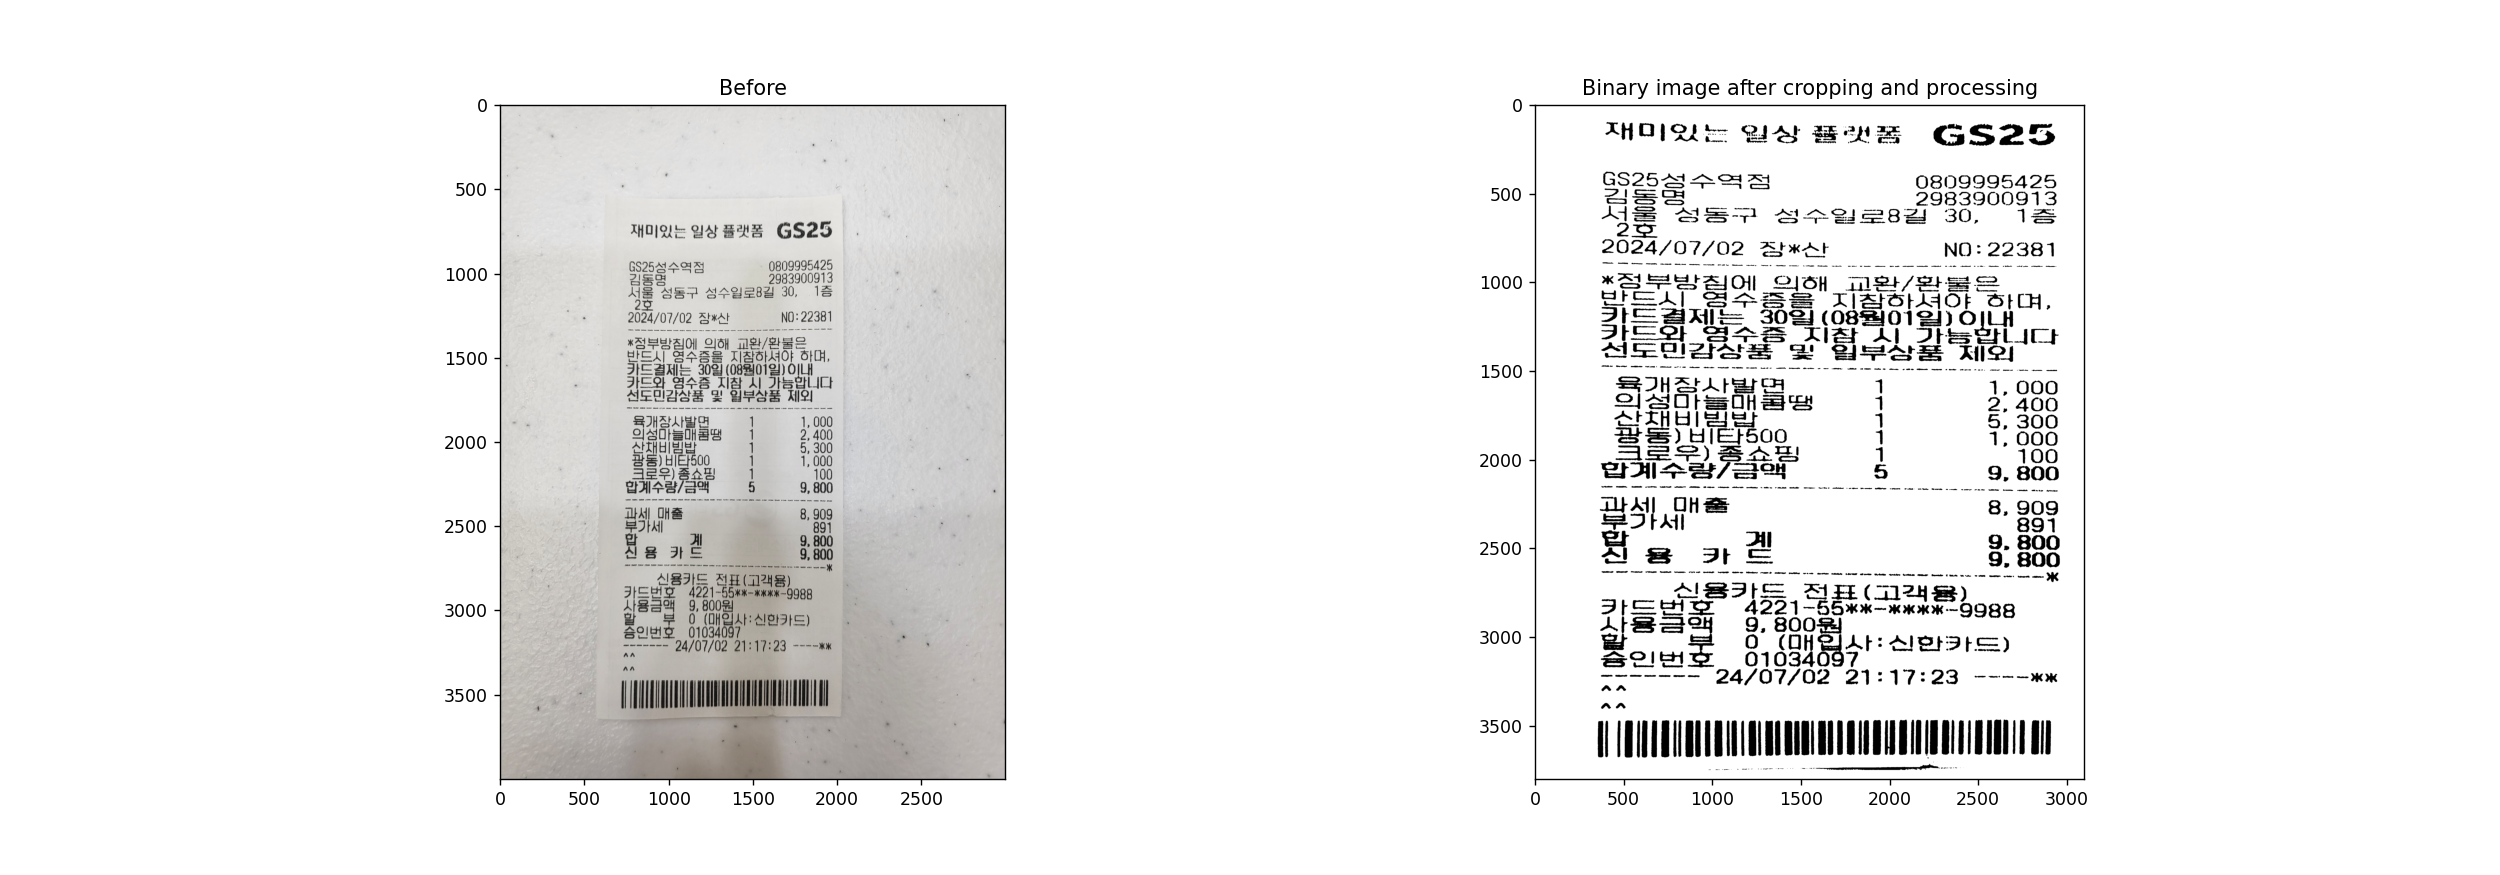

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


재 미 있 는 일 상 Benz 《5 룩 근드

825 설 소 역 첨 0809995425

asa 2983900913

SS ssa Saea2ese 30, 18

2024/07/02 BtxAt NO: 22381

KS SAO SIGH mMSHt/SBeae

만 드 스 | 영 소 층 을 지 참 하 셔 야 하 며

가 드 결 제 는 302) (084I012I) 0』。】"

카 드 와 Ses 지 참 시 가 능 압 니 다

선 도 민 감 상 품 및 일 부 상 품 Ie!

옥 개 상 사 발 먼 ㅣ 1, 000

Sl|S0tSs0h se] 1 2, 400

eSracnuol Seis 1 5, 300

공 동 ) HIE}500 1 1, 000

그 로 우 ) 총 쇼 핑 ㅣ 100

BAe aS /ee 5 9, 800

Hs OH 8, 909

부 가 서 | 891

갑 계 9. 800

슨 용 카 드 9. 800
슨 ! 융 카드 AE (4124 &)

카 드 번 호  4221-~-55**-*※*※*※※-9988

AS Se 9, 800%) ,

말 O ( 매 입 사 : 슨 한 : 카 드 )

품 인 번 010340

— 24/07/02 21:17:23 -—--— x

ANA
- ㅡ em ee ere eee :

--------------------------------------------------
[([[382, 73], [1110, 73], [1110, 238], [382, 238]], '재미있논', 0.6857390403747559), ([[1154, 94], [2075, 94], [2075, 243], [1154, 243]], '일상 풀 좀', 0.3072748335829862), ([[2244, 77], [2938, 77], [2938, 254], [2244, 254]], '6S25', 0.5885008661925708), ([[372, 360], [710, 360], [710, 476], [372, 476]], 'GS25', 0.9961785674095154),

In [29]:
image = cv2.imread(path)  # image size (9248, 6936, 3)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 여유 공간 추가를 위한 파라미터
top, bottom, left, right = 50,50,50,50


x1, y1 = 618, 558
x2, y2 = 2025, 525
x3, y3 = 574, 3642
x4, y4 = 2014, 3642

# 원래 이미지에서 차지하는 부분 좌표
src_points = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])

# 결과 이미지에서 원래 이미지 크기 그대로 자르기 위한 좌표
dst_points = np.float32([[0, 0], [3000, 0], [0, 3850], [3000, 3850]])

# 변환 매트릭스 생성
M = cv2.getPerspectiveTransform(src_points, dst_points)

# 이미지 변환
transformed_image = cv2.warpPerspective(image, M, (3000, 3850))

# 노란색을 흰색으로 변경
idx = np.where((transformed_image[:,:,0] > 170) & (transformed_image[:,:,1] > 170) & (transformed_image[:,:,2] < 100))
transformed_image[idx[0], idx[1], :] = [255, 255, 255]


# 이미지 crop
getROI = (0, 150, 3000, 3850) # (x, y, w, h)
img_cropped = transformed_image[getROI[1]:getROI[1]+getROI[3], getROI[0]:getROI[0]+getROI[2]]

# 이미지 이진화
gray = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY)




# 이미지에 여유 공간을 추가
img = cv2.copyMakeBorder(gray, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[255, 255, 255])




# blurred = cv2.medianBlur(gray, 3)
blur = cv2.GaussianBlur(img, ksize=(3,3),sigmaX=0)

# 미디안 블러
blur = cv2.medianBlur(blur, 3)


# blur[y:y+h, x:x+w] = total_roi

# 합계부분만 블러 x하기위해 영역지정
x, y, w, h = 10, 1700, 2000, 180

#합계부분만 따로 오츠 적용해주기


# 라플라시안 적용 전
thresh, binary = cv2.threshold(blur, 45, 248, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


x, y, w, h = 10, 1850, 2000, 180
total_roi = image[y:y+h, x:x+w]

gray_roi = cv2.cvtColor(total_roi, cv2.COLOR_RGB2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) # 이미지의 밝기 대비 조절을 위한 CLAHE 객체 생성
gray_roi = clahe.apply(gray_roi) # CLAHE 객체를 이용해 밝기 대비 조절
_, binary_img = cv2.threshold(gray_roi, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 이진화
kernel = np.ones((5, 5), np.uint8) # 팽창(dilate) 연산이 적용될 커널 설정
binary_img = cv2.dilate(binary_img, kernel, iterations=3) # 이미지의 이진화된 부분들 팽창 연산
_, label = cv2.connectedComponents(binary_img) # 이어진 영역 추출
uniq, counts = np.unique(label, return_counts=True) # 이어진 영역당 픽셀 수 카운팅
t_max_idx = np.argmax(counts[1:]) # 배경 영역은 뺀 최대값 영역 index 찾기
t_label = uniq[t_max_idx+1] # 이어진 영역들이 0부터 시작하므로 뺀 상태에서의 최대값 영역 구하기
h, w = label.shape[:2]
y, x = np.where(label == t_label) # 해당 영역의 윤곽을 찾아 추출
y_min, x_min = np.min(y), np.min(x)
y_max, x_max = np.max(y), np.max(x)

# 해당 영역에 적용할 마스크 생성
mask = np.zeros((h, w), dtype=np.uint8)
mask[y_min:y_max, x_min:x_max] = 255

# 해당 영역에만 흰색으로 적용한 결과 이미지
yellow_mask = cv2.bitwise_and(total_roi, total_roi, mask=mask)
yellow_mask[mask == 0] = [255, 255, 255]



plt.figure(figsize=[20, 7])

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Before")

plt.subplot(1,2,2)
plt.imshow(binary, cmap='gray')
plt.title("Binary image after cropping and processing")
plt.show()

# tesseract
text = read_pytesseract(binary)
easyocr_text = reader.readtext(binary)
text2 = read_easyocr(yellow_mask)
print(text)
print('--------------------------------------------------')
print(easyocr_text)
print('--------------------------------------------------')
print(text2)

In [30]:
for i, item in enumerate(easyocr_text):
    print(i, item[1])

0 재미있논
1 일상 풀 좀
2 6S25
3 GS25
4 설수역점
5 0809995425
6 2983900973
7 젊률
8 성동-구
9 성수일로8길
10 '30,
11 1증
12 2024/07/02
13 장*산
14 NO: 22381
15 X
16 의해
17 교환 /환 불은
18 '절불발증옛
19 드시
20 지참하서야 하  ,
21 탤출` 출
22 선제수
23 '콤핏
24 종
25 '똑핏이'월일다
26 및
27 일
28 복출
29 제회
30 물딩
31 988
32 둘직지실트
33 철
34 뱀
35 월밝0
36 }
37 출%
38 300
39 떼
40 우) 종소핑
41 합계수량/금액
42 9, 800
43 8,
44 gg육
45 품렉""
46 끝
47 용.808
48 ~- ~ -
49 ~X
50 속용물칼둥] 정퓨 *고쨌룻3988
51 카득렉p
52 9
53 800원
54 중인번물
55 01
56 @때임상:
57 (매
58 신화:카드)
59 24/07/02
60 21 : 17:23
61 ---XX
